##### CIS435: Practical Data Science with Machine Learning
##### Assignment 4b: Deep Neural Network (DNN) with Tensorflow
## Breast Cancer Prediction of Malignant or Benign
Author: Mark Cody
Date: March 7, 2021

Purpose: Use Breast Cancer Wisconsin (Diagnostic) Data Set and deep learning to predict whether the cancer is benign or malignant. In this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Preparation


In [2]:
data = pd.read_csv('bdata.csv')

In [3]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,1


In [4]:
data.shape

(569, 23)

#### Create and scale the train and test datasets

In [12]:
from sklearn.model_selection import train_test_split
X = data.drop(['diagnosis'], axis=1).values
y = data['diagnosis'].values
#Split X and y into train and test sets with proportion 75%/25%.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state=42)

In [13]:
# Scale the features with the formula below or with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Confirm scaler
X_train[:1]

array([[0.        , 0.2546158 , 0.11531958, 0.24164177, 0.14824509,
        0.15274894, 0.06133142, 0.0529522 , 0.0582008 , 0.09076348,
        0.12320977, 0.01510049, 0.02404526, 0.01686849, 0.01097875,
        0.10259374, 0.0841019 , 0.04171717, 0.11185831, 0.15506365,
        0.04098089, 0.18061545]])

In [15]:
print("X:",X_train.shape, X_test.shape)
print('Y:',y_train.shape, y_test.shape)

X: (426, 22) (143, 22)
Y: (426,) (143,)


#### Create, compile, and train the model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [17]:
#CREATE
model = Sequential()
#Create an input layer with neurons equal to the nbr of features.
model.add(Dense(units=22,activation='relu'))
model.add(Dropout(0.5)) #Drop out half to avoid overfitting.
#Create a hidden layer with neurons equal to the avg.
model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5)) #Drop out half to avoid overfitting. 
#Create an output layer with sigmoid function for binary classification.
model.add(Dense(units=1,activation='sigmoid'))

In [20]:
#COMPILE
#Use optimizer, loss, and metrics for binary classification.
model.compile(optimizer = 'rmsprop', 
               loss = 'binary_crossentropy')

In [21]:
#PREP CALLBACKS 
#Define Tensorboard prior to fitting the model.
log_directory = 'logs/fit'
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)
#Define early stopping prior to fitting the model.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [22]:
#FIT
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, board]
          )

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.7417 - val_loss: 0.6751
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6975 - val_loss: 0.6601
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6771 - val_loss: 0.6460
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6609 - val_loss: 0.6327
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6442 - val_loss: 0.6208
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6411 - val_loss: 0.6082
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6312 - val_loss: 0.5954
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6291 - val_loss: 0.5815
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5921 - val_loss: 0.5659
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5998 - val_loss: 0.5440
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2593 - val_loss: 0.0967
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2372 - val_loss: 0.0958
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2248 - val_loss: 0.0931
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2319 - val_loss: 0.0972
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2462 - val_loss: 0.0941
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2152 - val_loss: 0.0913
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2284 - val_loss: 0.0969
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2327 - val_loss: 0.0941
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2218 - val_loss: 0.0965
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2265 - val_loss: 0.0934


14/14 [==============================] - 0s 4ms/step - loss: 0.1673 - val_loss: 0.0777
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1853 - val_loss: 0.0734
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1474 - val_loss: 0.0733
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1270 - val_loss: 0.0704
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1641 - val_loss: 0.0669
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1533 - val_loss: 0.0705
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1660 - val_loss: 0.0717
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1579 - val_loss: 0.0744
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1681 - val_loss: 0.0724
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1654 - val_loss: 0.0761
Epoc

#### Evaluate the model

In [34]:
print(log_directory)

logs\fit


In [35]:
pwd

'/Users/markcody/Desktop/MSIS/435-Machine-Learning/Assignments/04-Deep-Learning'

From the command prompt, cd to the pwd and enter the command: tensorboard --logdir logs\fit. Then find tensorboard in your browser at http://localhost:6006/

<AxesSubplot:>

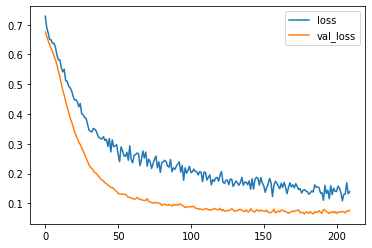

In [23]:
#PLOT HISTORY
# Add the loss to a dataframe and plot with pandas.
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [24]:
#EVALUATE
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)

/Users/markcody/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98        89
          1       0.95      0.98      0.96        54

avg / total       0.97      0.97      0.97       143



In [26]:
print(confusion_matrix(y_test,predictions))

[[86  3]
 [ 1 53]]


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

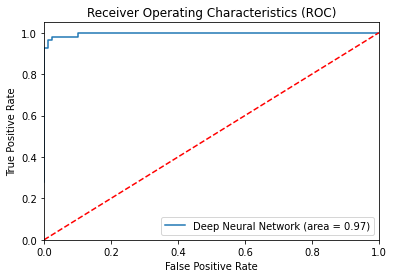

In [30]:
# Display the Receiver Operating Characteristics (ROC) graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dnn_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, 
                                 model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, 
         label='Deep Neural Network (area = %0.2f)' % dnn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc="lower right")
plt.savefig('dnn_ROC')
plt.show()

In [31]:
# Calculate the Area Under the Curve (AUC)
from sklearn import metrics
dnnauc = metrics.auc(fpr, tpr)
print('AUC: %.3f' % dnnauc)

AUC: 0.997
